# Data Science in Python part 2

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

pd.DataFrame.iteritems = pd.DataFrame.items

## Fixing data

In the previous notebook you may have found the following things about the data:

- Dropped decimal points: mortality rates, vaccination percentages and GDP had entries which look off by factors of 10, 100, 1000, etc.
- Other bimodal or multimodal distributions: for example BMI figures look out in certain countries but not by factors of 10. This might be because BMI is calculated from other measurements (feet and inches instead of metres, pounds instead of kg) and not converted properly.
- Infant mortality rates should be per 1000, but the maximum values are 1800!
- Percentage expentidure should be out of 100, but for some countries was much higher.
- It looks like some countries recorded measles as a rate, and others as total incidence. Note that in Ghana, the drop in measles measurements does coincide with a measles vaccination programme in 2002/2003.
- There are lots of missing values.

With most of these issues, it's not easy to fix the data in a sensible way. The best thing to do is to find alternative data to compare or use instead.

Sometimes, however, you may be forced to use the data you have available. Here are some things you can do.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/IDEMSInternational/GHAIDEMS-data-training/main/life_expectancy.csv")

### Fill in missing values

The following code fills in the missing values in the "Alcohol" column with the total mean for that column. Why might this be innappropriate?

In [3]:
df["Alcohol"] = df["Alcohol"].fillna(df["Alcohol"].mean())

### Fix decimal point errors

Here is a basic attempt to fix some decimal point errors in the Ghana GDP column.

In [4]:
df_ghana = df[df["Country"] == "Ghana"]

In [5]:
df_ghana["GDP"]

1010    1361.113950
1011    1432.227943
1012    1814.492297
1013    1629.822200
1014    1574.978653
1015    1312.675570
1016     186.765380
1017    1224.415540
1018      19.686718
1019     922.935168
1020     498.172394
1021     423.193639
1022     373.281554
1023      39.484473
1024     273.659667
1025     263.112468
Name: GDP, dtype: float64

In [6]:
df_ghana.loc[:,"GDP"] = np.where(df_ghana["GDP"] < 200, df_ghana["GDP"]*10, df_ghana["GDP"])

In [7]:
df_ghana["GDP"]

1010    1361.113950
1011    1432.227943
1012    1814.492297
1013    1629.822200
1014    1574.978653
1015    1312.675570
1016    1867.653800
1017    1224.415540
1018     196.867180
1019     922.935168
1020     498.172394
1021     423.193639
1022     373.281554
1023     394.844730
1024     273.659667
1025     263.112468
Name: GDP, dtype: float64

What are the problems with doing this? How could you improve it?

## A fixed dataset

Fortunately, someone has already gone through to fix a lot of the dataset errors, including the decimal point errors, sporadic data and missing values.

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/IDEMSInternational/GHAIDEMS-data-training/main/life_expectancy_fixed.csv")

In [9]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Developed
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,76.5,0
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,82.8,1
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,65.4,0
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,67.0,0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,81.7,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

The column names are slightly different, but the data is largely the same. We see there are no missing values.

Unfortunately, the data is not in the same order. The following command orders the data first by Country, alphabetically, and then by Year, numerically.

In [11]:
df = df.sort_values(["Country", "Year"]).reset_index(drop=True)

In [12]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Developed
0,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,24,24,0.02,148,20.78,2.3,2.5,2.2,55.8,0
1,Afghanistan,Asia,2001,87.9,125.2,304.8580,0.02,63,13,21.8,35,33,0.02,163,21.61,2.1,2.4,2.2,56.3,0
2,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.02,64,14,21.9,36,36,0.02,320,22.60,19.9,2.2,2.3,56.8,0
3,Afghanistan,Asia,2003,82.7,116.9,292.0365,0.02,65,15,22.0,41,41,0.02,332,23.68,19.7,19.9,2.4,57.3,0
4,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.02,67,16,22.1,50,50,0.02,323,24.73,19.5,19.7,2.5,57.8,0


If you want, you can check the data using the methods in the previous notebook.

## Visualising data in plotly

### Viewing mean data per country

The following command finds the mean value of each column for each country (each country has multiple values for each year 2000-2015).

In [13]:
df_mean = df.drop("Year", axis=1).groupby(["Country", "Region"]).mean(numeric_only=True).reset_index()

In [14]:
df_mean.head()

,Country,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Developed
0,Afghanistan,Asia,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,59.65625,0.0
1,Albania,Rest of Europe,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,75.95000,0.0
2,Algeria,Africa,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,73.78750,0.0
3,Angola,Africa,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,52.82500,0.0
4,Antigua and Barbuda,Central America and Caribbean,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,75.35000,0.0


Let's make a plot of adult mortality against life expectancy.

In [15]:
fig = px.scatter(
    data_frame=df_mean,
    x="Life_expectancy",
    y="Adult_mortality",
)
fig.show()

Let's add country labels and a trendline.

In [16]:
fig = px.scatter(
    data_frame=df_mean,
    x="Life_expectancy",
    y="Adult_mortality",
    hover_name="Country",
    trendline="ols",
)
fig.show()

We can use colour, size and shape to visualise multidimensionality.

In [17]:
fig = px.scatter(
    data_frame=df_mean,
    x="Life_expectancy",
    y="Adult_mortality",
    hover_name="Country",
    color="Region",
    size="GDP_per_capita",
    symbol="Developed",
    trendline="ols",
    trendline_scope="overall")
fig.show()


Maybe that got too messy! We can use faceting to separate out some of the information.

In [18]:
fig = px.scatter(
    data_frame=df_mean,
    x="Life_expectancy",
    y="Adult_mortality",
    hover_name="Country",
    facet_row="Developed",
    size="GDP_per_capita",
    color="Region",
    trendline="ols",
    trendline_scope="overall")
fig.show()

### Finding other correlations and relationships

Pandas dataframes have a `df.corr()` method which produces a correlation matrix between all variables.

In [19]:
corr = df_mean.corr(numeric_only=True)

display(corr)

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Developed
Infant_deaths,1.000000,0.987113,0.801403,-0.474708,-0.563377,-0.572984,-0.663046,-0.787676,-0.766571,0.349174,-0.527737,0.012181,0.539041,0.522838,-0.804119,-0.925210,-0.491625
Under_five_deaths,0.987113,1.000000,0.808765,-0.430579,-0.561534,-0.563805,-0.671676,-0.788192,-0.767443,0.364131,-0.487815,-0.001150,0.513324,0.494453,-0.794305,-0.926917,-0.444753
Adult_mortality,0.801403,0.808765,1.000000,-0.255737,-0.373765,-0.456096,-0.522031,-0.558145,-0.545932,0.698686,-0.524443,-0.053163,0.414027,0.410116,-0.585492,-0.947485,-0.443039
Alcohol_consumption,-0.474708,-0.430579,-0.255737,1.000000,0.200192,0.346817,0.292670,0.335938,0.335655,-0.035410,0.453253,-0.040623,-0.499256,-0.484319,0.638571,0.416061,0.683701
Hepatitis_B,-0.563377,-0.561534,-0.373765,0.200192,1.000000,0.469372,0.374349,0.810698,0.840369,-0.069664,0.177331,-0.100396,-0.249768,-0.254809,0.378082,0.451723,0.131750
Measles,-0.572984,-0.563805,-0.456096,0.346817,0.469372,1.000000,0.441975,0.579777,0.556216,-0.165023,0.336252,-0.109160,-0.396136,-0.424976,0.532334,0.529514,0.322733
BMI,-0.663046,-0.671676,-0.522031,0.292670,0.374349,0.441975,1.000000,0.489551,0.455793,-0.156277,0.337446,-0.171891,-0.648553,-0.650356,0.631831,0.594403,0.247128
Polio,-0.787676,-0.788192,-0.558145,0.335938,0.810698,0.579777,0.489551,1.000000,0.975825,-0.145395,0.347979,-0.042797,-0.374703,-0.365732,0.606130,0.682368,0.315356
Diphtheria,-0.766571,-0.767443,-0.545932,0.335655,0.840369,0.556216,0.455793,0.975825,1.000000,-0.142655,0.348680,-0.036435,-0.356687,-0.346310,0.587403,0.666607,0.323561
Incidents_HIV,0.349174,0.364131,0.698686,-0.035410,-0.069664,-0.165023,-0.156277,-0.145395,-0.142655,1.000000,-0.175036,-0.059067,0.192919,0.197019,-0.198812,-0.552180,-0.181391


The seaborn plot `heatmap` is very useful for visualising this.

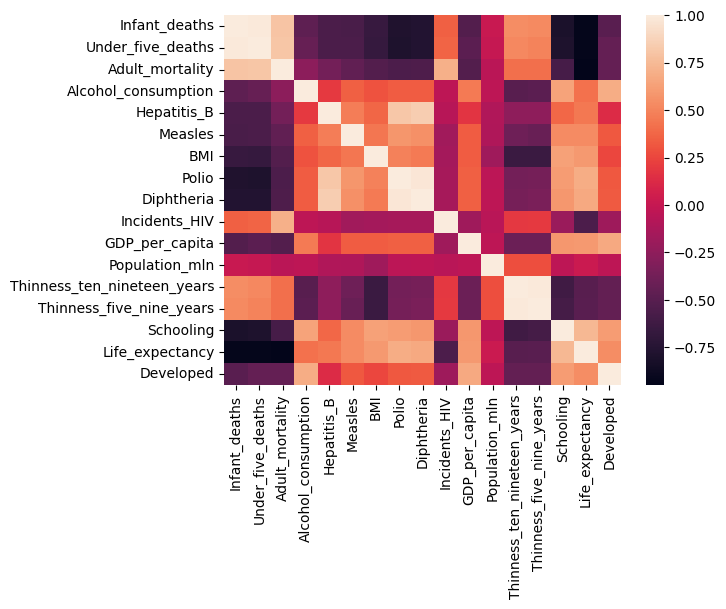

In [20]:
sns.heatmap(corr)
plt.show()

You can use this matrix to produce some plots like the one we did for adult mortality against life expectancy.

In [21]:
fig = px.scatter_matrix(df_mean, dimensions=["Schooling", "Hepatitis_B", "Adult_mortality", "GDP_per_capita"], color="Region", hover_name="Country")
fig.show()

### Some final cool things!

You can animate a plot to visualise evolution over time. We'll return to the dataframe `df` for this, but again look at adult mortality against life expectancy.

In [22]:
fig = px.scatter(
    data_frame=df,
    x="Life_expectancy",
    y="Adult_mortality",
    hover_name="Country",
    color="Region",
    size="GDP_per_capita",
    animation_frame="Year",
)
fig.show()

Almost every plotly plot can be animated in this way. It's a great way to view the time dimension of data.

For the final cool thing, since this data is geographical, we can use plotly to produce a map plot. To do this, we need to supply each country in the list with its 'Iso 3 alpha' code. For example Afghanistan = AFG, Ghana = GHA, etc.

The file `iso_3alpha_codes.csv` contains this. To add it to our dataframe we can use a left-merge with `pd.merge()`.

In [23]:
iso = pd.read_csv("https://raw.githubusercontent.com/IDEMSInternational/GHAIDEMS-data-training/main/iso_3alpha_codes.csv")

In [24]:
iso.head()

,Country,ISO3
0,Turkiye,TUR
1,Spain,ESP
2,India,IND
3,Guyana,GUY
4,Israel,ISR


In [25]:
df_new = pd.merge(df, iso, how="left", on="Country")

In [26]:
df_new.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Developed,ISO3
0,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,...,24,0.02,148,20.78,2.3,2.5,2.2,55.8,0,AFG
1,Afghanistan,Asia,2001,87.9,125.2,304.8580,0.02,63,13,21.8,...,33,0.02,163,21.61,2.1,2.4,2.2,56.3,0,AFG
2,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.02,64,14,21.9,...,36,0.02,320,22.60,19.9,2.2,2.3,56.8,0,AFG
3,Afghanistan,Asia,2003,82.7,116.9,292.0365,0.02,65,15,22.0,...,41,0.02,332,23.68,19.7,19.9,2.4,57.3,0,AFG
4,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.02,67,16,22.1,...,50,0.02,323,24.73,19.5,19.7,2.5,57.8,0,AFG


Let's look at how measles vaccination rates have evolved over time.

In [27]:
fig = px.choropleth(df_new, locations="ISO3", color="Measles", hover_name="Country", animation_frame="Year")
fig.show()